In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb

In [54]:
data = pd.read_csv("./data/train_data.csv")

In [55]:
data.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,deltaTime
0,1003450,M,26/01/21 2:21,26/01/21 2:21,26/01/21 2:32,26/01/21 2:49,11696,15.666,39.75,46.0,46.0,5.0,Normal,low,621.0,0.0,0,0.019444
1,1003451,F,26/01/21 2:33,26/01/21 2:33,26/01/21 2:50,26/01/21 3:11,18117,25.207,41.40,8.0,8.0,4.0,Prime,other,105.0,0.0,0,0.026389
2,1003452,M,26/01/21 2:39,26/01/21 2:39,26/01/21 2:56,26/01/21 3:12,18623,22.074,72.00,1.0,1.0,2.0,Normal,other,66.0,0.0,0,0.022917
3,1003453,M,26/01/21 2:47,26/01/21 2:48,26/01/21 3:21,26/01/21 3:41,15945,21.894,95.70,1.0,1.0,5.0,Prime,low,127.0,0.0,0,0.037500
4,1003454,F,26/01/21 3:06,26/01/21 3:07,26/01/21 3:31,26/01/21 4:00,17589,27.870,60.15,34.0,34.0,0.0,Normal,low,84.0,0.0,0,0.037500


In [56]:
data.describe()

,order_id,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,lifetime_order_count,undelivered_orders,dissatisfaction,deltaTime
count,3.396000e+05,339600.000000,339600.000000,339600.000000,326624.000000,326319.000000,339572.000000,339560.000000,326319.000000,339600.000000,339600.000000
mean,1.173250e+06,8133.815607,12.263379,44.823828,104.509610,103.836393,2.988029,863.876964,0.769492,0.011793,-521.421442
std,9.803422e+04,5822.120005,8.468352,28.644249,89.779222,89.283145,1.411828,1510.326690,1.070457,0.107955,4773.861586
min,1.003450e+06,0.000000,0.001343,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-44230.634720
25%,1.088350e+06,3005.000000,5.365000,22.050000,36.000000,36.000000,2.000000,172.000000,0.000000,0.000000,0.015278
50%,1.173250e+06,7096.000000,11.339000,40.200000,81.000000,81.000000,3.000000,404.000000,0.000000,0.000000,0.020139
75%,1.258149e+06,12624.000000,18.472250,63.600000,147.000000,146.000000,4.000000,958.000000,1.000000,0.000000,0.026389
max,1.343049e+06,21566.000000,420.381000,336.150000,565.000000,560.000000,5.000000,30469.000000,9.000000,1.000000,6.956944


In [57]:
#Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [58]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 18 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
delivered_orders,13281,3.9
undelivered_orders,13281,3.9
alloted_orders,12976,3.8
delivered_time,4004,1.2
pickup_time,1884,0.6
lifetime_order_count,40,0.0
customer_care_calls,28,0.0


In [59]:
#lets do Lable enconding coding to make more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 3:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            print(col)
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

gender
membership
product_importan
3 columns were label encoded.


<AxesSubplot:>

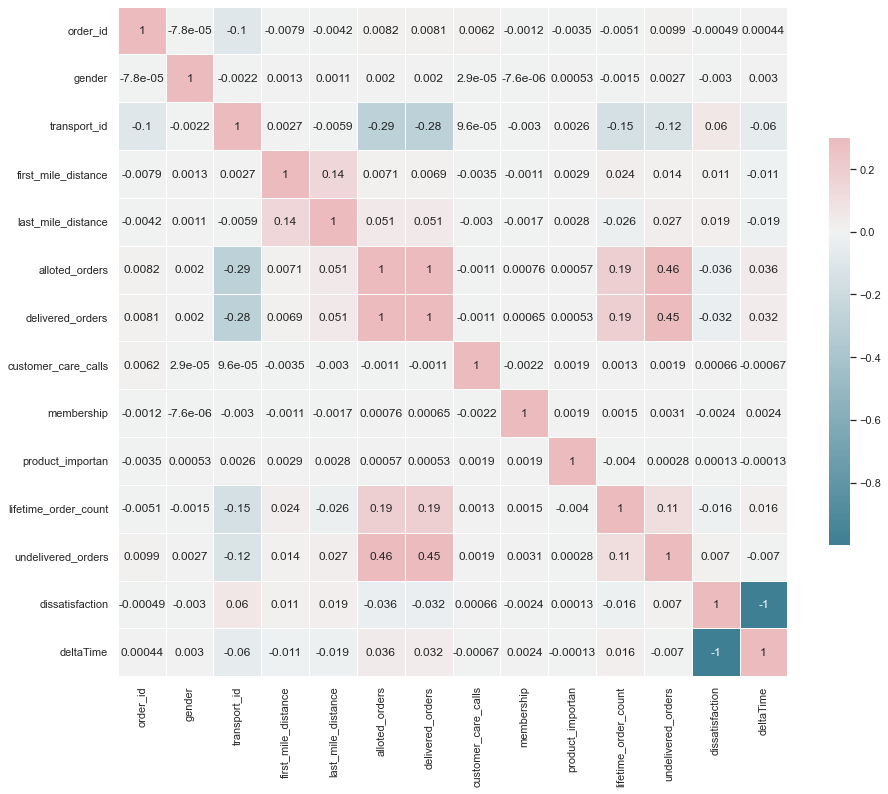

In [60]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
for col in data:
    print(col, data[col].dtype)

order_id int64
gender int64
order_time object
allot_time object
pickup_time object
delivered_time object
transport_id int64
first_mile_distance float64
last_mile_distance float64
alloted_orders float64
delivered_orders float64
customer_care_calls float64
membership int64
product_importan int64
lifetime_order_count float64
undelivered_orders float64
dissatisfaction int64
deltaTime float64


In [62]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
3,delivered_time,7780
2,pickup_time,7605
1,allot_time,7486
0,order_time,7358


In [63]:
data.drop(['delivered_time','pickup_time','allot_time','order_time'],axis=1, inplace=True)

<AxesSubplot:xlabel='membership', ylabel='count'>

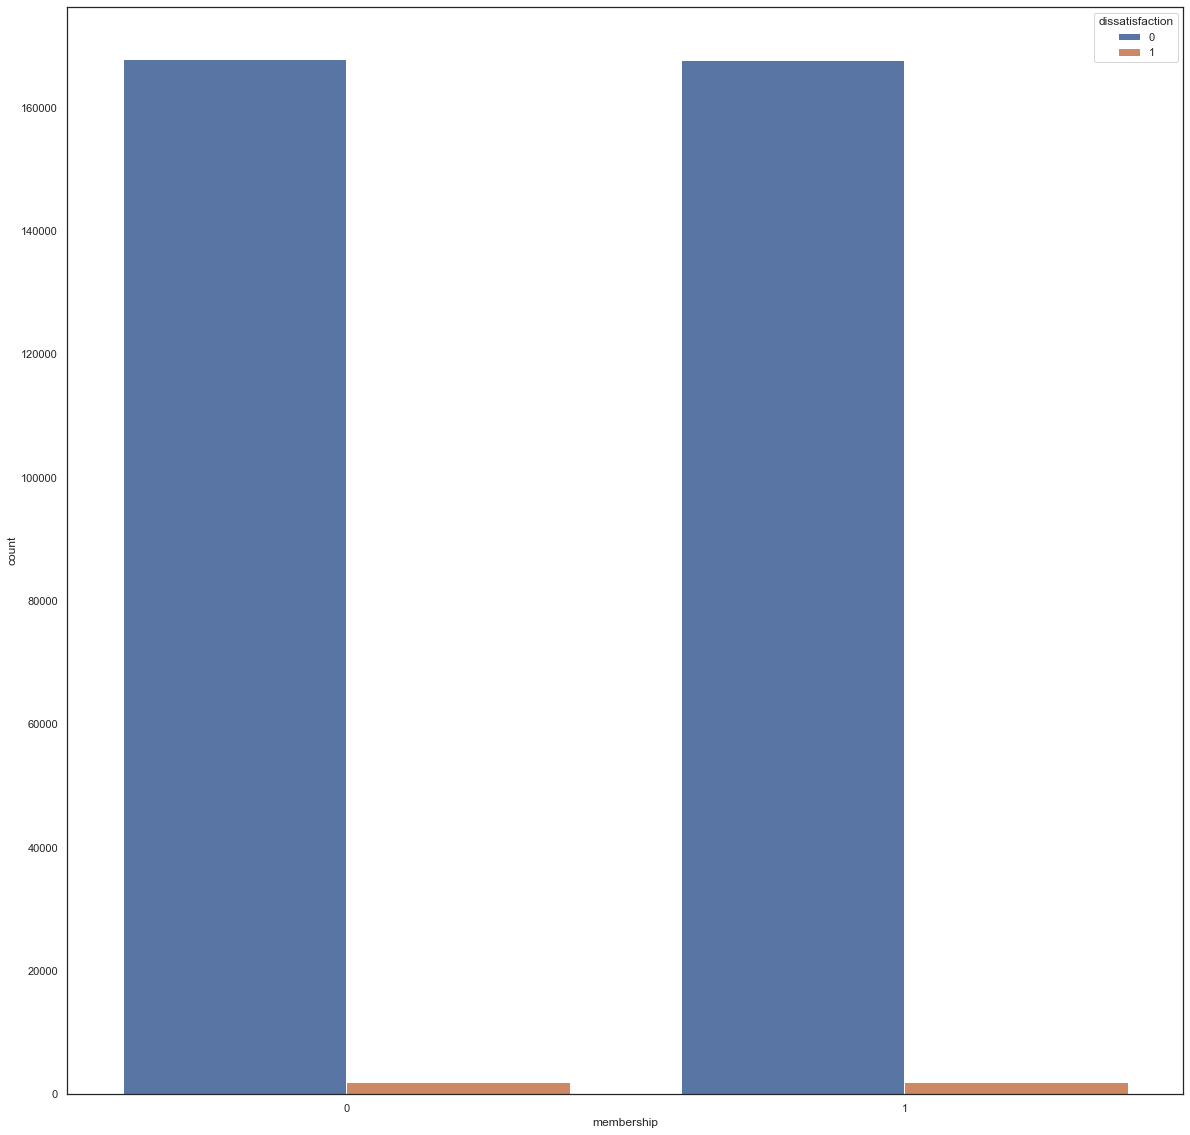

In [64]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='membership',hue='dissatisfaction',data=data)


In [65]:
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
delivered_orders,13281,3.9
undelivered_orders,13281,3.9
alloted_orders,12976,3.8
lifetime_order_count,40,0.0
customer_care_calls,28,0.0


In [66]:
#f, ax = plt.subplots(figsize=(20, 20))
corr= data.corr()
y=data['dissatisfaction']
X= data.drop('dissatisfaction',axis=1)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [70]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":100,
       "reg_alpha" : 0.5,
       "reg_lambda":0.5,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":30,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 10,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 60,
       "max_bin":60,
       'max_depth':3,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':1.4,
        'bagging_fraction':0.8
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [71]:
pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, X_test)
print("LightGBM Training Completed...")


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8715623 will be ignored. Current value: bagging_fraction=0.8


/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeevakumar/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeevakum

Training until validation scores don't improve for 100 rounds
[100]	training's f1: 0.999822	valid_1's f1: 1
Did not meet early stopping. Best iteration is:
[92]	training's f1: 0.999822	valid_1's f1: 1
LightGBM Training Completed...


In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
roc_auc_score(y_test,pred_test)

0.9999999999999999

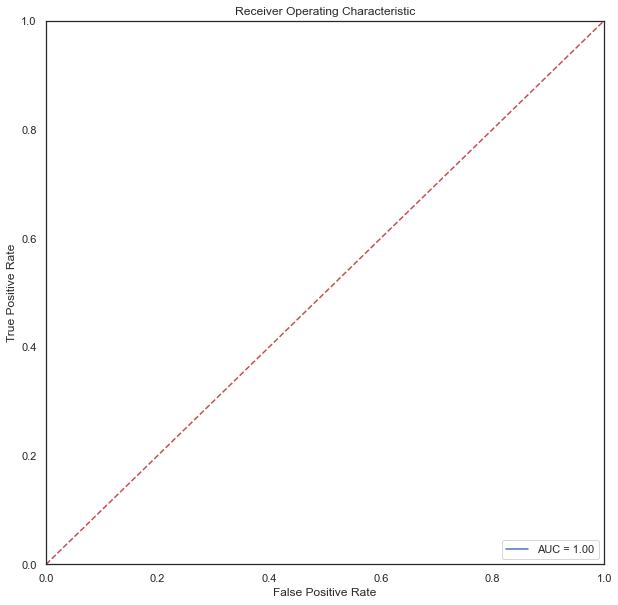

In [74]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_test)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plot feature importances...


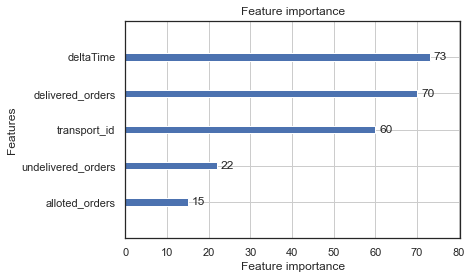

In [75]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=5)
plt.show()

In [76]:
type(model)

lightgbm.basic.Booster

In [83]:
test = pd.read_csv("./data/test_data.csv")

In [84]:
test.head()

,order_id,gender,order_time,allot_time,pickup_time,delivered_time,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,dissatisfaction,deltaTime
0,1343050,M,03/02/21 15:15,03/02/21 15:15,03/02/21 15:38,03/02/21 15:52,14480,10.109,41.70,108.0,106.0,4,Normal,other,357.0,2.0,0,0.025694
1,1343051,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:26,03/02/21 15:46,14594,6.547,74.10,46.0,46.0,2,Prime,other,253.0,0.0,0,0.021528
2,1343052,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:34,03/02/21 15:46,5486,17.193,23.55,94.0,90.0,2,Prime,other,2229.0,4.0,0,0.021528
3,1343053,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:34,03/02/21 15:42,11578,26.838,17.55,24.0,24.0,3,Prime,low,161.0,0.0,0,0.018750
4,1343054,F,03/02/21 15:15,03/02/21 15:15,03/02/21 15:30,03/02/21 15:43,2322,13.001,42.90,24.0,24.0,1,Normal,low,65.0,0.0,0,0.019444


In [90]:
data.drop(['delivered_time','pickup_time','allot_time','order_time'],axis=1, inplace=True)

KeyError: "['delivered_time', 'pickup_time', 'allot_time', 'order_time'] not found in axis"

In [91]:
test.head()

,order_id,gender,transport_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,customer_care_calls,membership,product_importan,lifetime_order_count,undelivered_orders,deltaTime
0,1343050,M,14480,10.109,41.70,108.0,106.0,4,Normal,other,357.0,2.0,0.025694
1,1343051,F,14594,6.547,74.10,46.0,46.0,2,Prime,other,253.0,0.0,0.021528
2,1343052,F,5486,17.193,23.55,94.0,90.0,2,Prime,other,2229.0,4.0,0.021528
3,1343053,F,11578,26.838,17.55,24.0,24.0,3,Prime,low,161.0,0.0,0.018750
4,1343054,F,2322,13.001,42.90,24.0,24.0,1,Normal,low,65.0,0.0,0.019444


In [93]:
model.predict(data = test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: gender, membership, product_importan

In [94]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in test:
    if test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(test[col].unique())) <= 3:
            # Train on the training data
            le.fit(test[col])
            # Transform both training and testing data
            test[col] = le.transform(test[col])
            print(col)
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

gender
membership
product_importan
3 columns were label encoded.


In [95]:
model.predict(data = test)

array([0.00568157, 0.00606449, 0.00568157, ..., 0.00573988, 0.00589058,
       0.00573988])

In [96]:
result = model.predict(data = test)

In [97]:
result

array([0.00568157, 0.00606449, 0.00568157, ..., 0.00573988, 0.00589058,
       0.00573988])

In [99]:
result_df = pd.DataFrame()

In [100]:
result_df['dissatisfaction'] = result

In [101]:
result_df.head()

,dissatisfaction
0,0.005682
1,0.006064
2,0.005682
3,0.005892
4,0.005777


In [103]:
result_df.describe()

,dissatisfaction
count,110400.000000
mean,0.011664
std,0.055766
min,0.005527
25%,0.005527
50%,0.005740
75%,0.005777
max,0.628593


In [104]:
result_df[result_df['dissatisfaction'] >= 0.5]

,dissatisfaction
194,0.521645
247,0.566147
380,0.556382
395,0.537178
526,0.531111
...,...
110138,0.521645
110322,0.528553
110328,0.521645
110332,0.528553


In [105]:
result_df['dissatisfaction'] = result_df['dissatisfaction'].apply(lambda x: 1 if x >= 0.5 else 0)

In [106]:
result_df.describe()

,dissatisfaction
count,110400.000000
mean,0.010987
std,0.104243
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [107]:
result_df.head()

,dissatisfaction
0,0
1,0
2,0
3,0
4,0


In [110]:
result_df['order_id'] = test['order_id']

In [112]:
result_df.describe()

,dissatisfaction,order_id
count,110400.000000,1.104000e+05
mean,0.010987,1.398250e+06
std,0.104243,3.186988e+04
min,0.000000,1.343050e+06
25%,0.000000,1.370650e+06
50%,0.000000,1.398250e+06
75%,0.000000,1.425849e+06
max,1.000000,1.453449e+06


In [113]:
result_df.to_csv("submition.csv")